In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt

## Sınıflandırma Problemi

In [ ]:
# iris veri setini kullanarak 3 sınıflı (setosa,versicolor,virginica) bir sınıflandırma problemini çözeriz. 

### Veri Seti İncelemesi

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
X = iris.data  # features
y = iris.target  # target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### DT modeli oluştur ve train et

In [7]:
tree_clf = DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=42)

In [8]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Modelin test edilmesi ve değerlendirilmesi

In [9]:
y_pred = tree_clf.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test,y_pred)
print("iris veri seti ile eğitilen DT modeli doğruluğu: ", accuracy)

iris veri seti ile eğitilen DT modeli doğruluğu:  1.0


In [11]:
conf_matrix = confusion_matrix(y_test , y_pred)
print("conf_matrix: ")
conf_matrix

conf_matrix: 


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### Karar Ağacını Görselleştirelim 

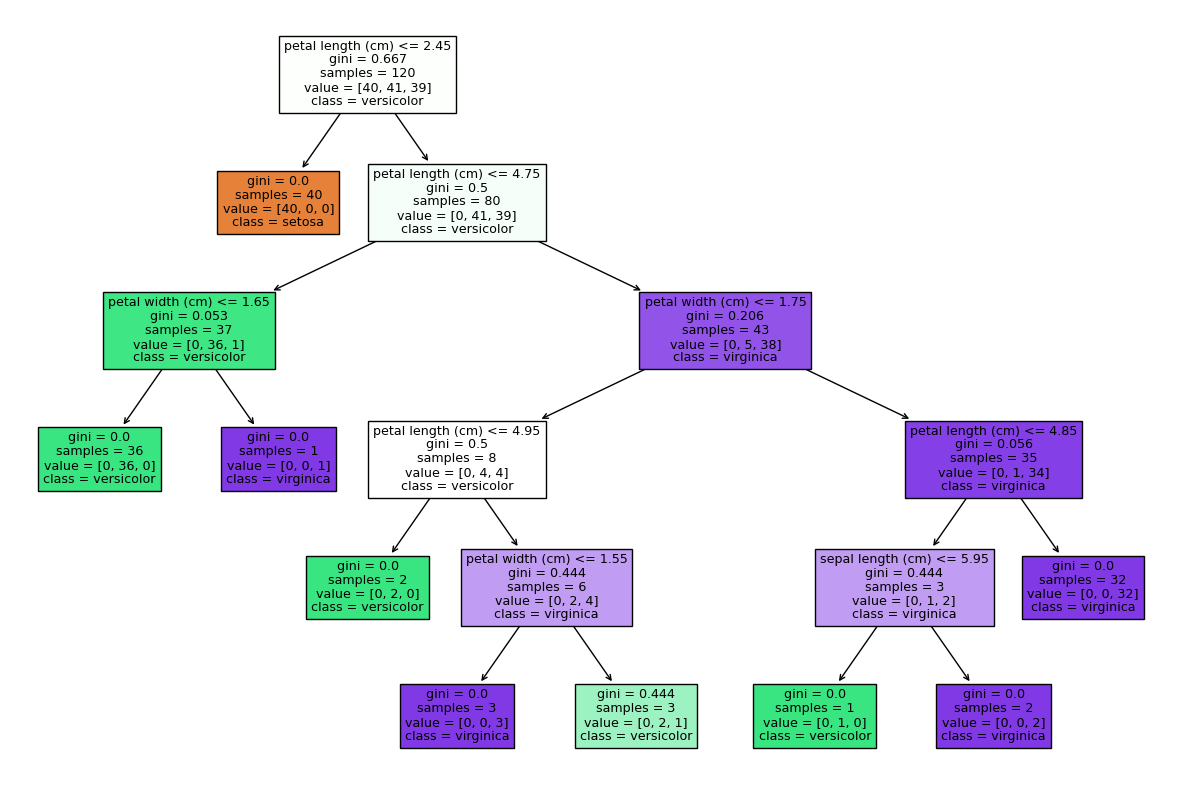

In [12]:
plt.figure(figsize=(15,10))
plot_tree(tree_clf,filled=True,feature_names=iris.feature_names,class_names=list(iris.target_names))
plt.show()

In [13]:
tree_clf.feature_importances_

array([0.01695274, 0.        , 0.90455226, 0.078495  ])

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
feature_importances = tree_clf.feature_importances_
feature_names = iris.feature_names
feature_importances_sorted = sorted(zip(feature_importances,feature_names),reverse = True)

for importance,feature_name in feature_importances_sorted:
    print(f"{feature_name} = {importance}")

petal length (cm) = 0.9045522597319637
petal width (cm) = 0.07849499604256478
sepal length (cm) = 0.016952744225471498
sepal width (cm) = 0.0


###  feature selection

In [ ]:
# İris veri setindeki featureları ikili pairler şeklinde DT algoritmasını eğitiriz. Sonuçları görselleştirerek hangi
# featurelar bir arada kullanılırsa ne gibi sonuçlar çıkar değerlendiririz.

In [16]:
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [17]:
iris = load_iris()

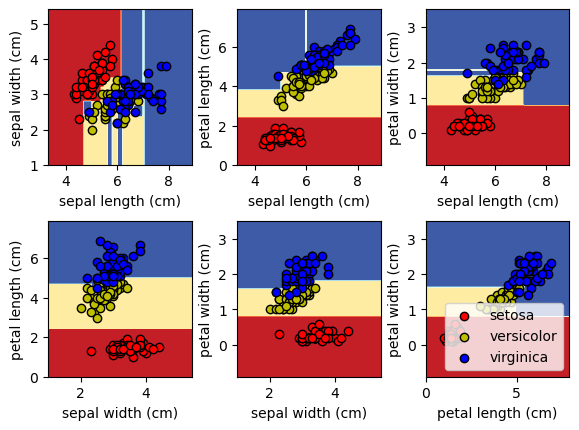

In [18]:
n_classes = len(iris.target_names)
plot_colors = "ryb"

for pairidx,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    
    X=iris.data[:,pair]
    y=iris.target
    
    clf = DecisionTreeClassifier().fit(X,y)
    
    ax = plt.subplot(2,3,pairidx + 1)
    plt.tight_layout(h_pad=0.5 , w_pad=0.5, pad=2.5)
    
    DecisionBoundaryDisplay.from_estimator(clf,
                                           X,
                                           cmap = plt.cm.RdYlBu,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=iris.feature_names[pair[0]],
                                           ylabel=iris.feature_names[pair[1]])
    
    
    for i,color in zip(range(n_classes),plot_colors):
        idx= np.where(y==i)
        plt.scatter(X[idx,0],X[idx,1], c=color , label = iris.target_names[i] , cmap = plt.cm.RdYlBu ,edgecolors = "black")

plt.legend()

## Regresyon Problemi

In [19]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import numpy as np

In [20]:
diabetes = load_diabetes()

In [21]:
X = diabetes.data
y = diabetes.target

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)  

In [23]:
#karar ağacı regresyon modeli
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
y_pred = tree_reg.predict(X_test)

In [25]:
mse = mean_squared_error(y_test , y_pred)
mse

4976.797752808989

In [26]:
rmse = np.sqrt(mse)
rmse

70.54642267903446

### ----------------------------------

In [27]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# veri seti oluşturma
X = np.sort(5 * np.random.rand(80,1),axis=0) 
y = np.sin(X).ravel()
y[::5] += 0.5 * (0.5 - np.random.rand(16))

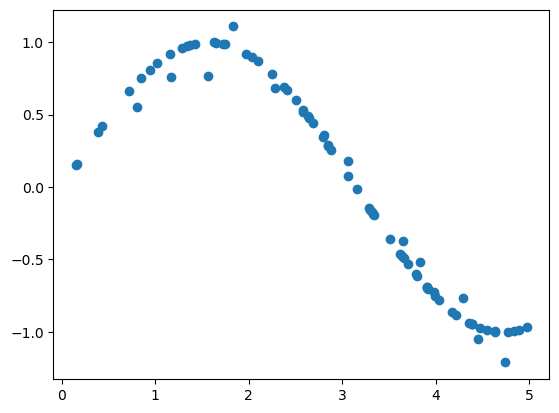

In [29]:
plt.scatter(X,y)

In [30]:
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 5)

In [31]:
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [32]:
X_test = np.arange(0,5,0.05)[:,np.newaxis]

In [33]:
y_pred_1=regr_1.predict(X_test)
y_pred_2=regr_2.predict(X_test)

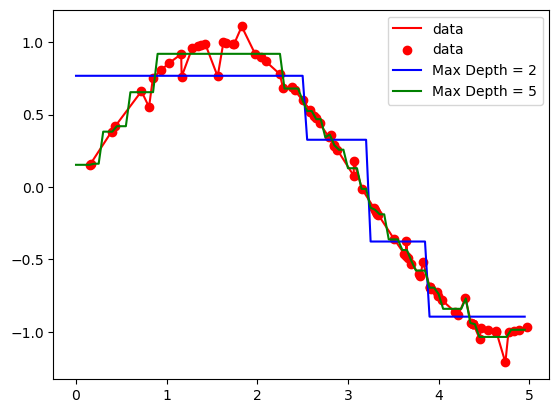

In [34]:
plt.figure()
plt.plot(X,y,c="red", label = "data")
plt.scatter(X,y,c="red", label = "data")
plt.plot(X_test,y_pred_1,color = "blue",label = "Max Depth = 2")
plt.plot(X_test,y_pred_2,color = "green",label = "Max Depth = 5")
plt.legend()